# Data Analysis, Visualizations, and Creating a Model

<i>**Author:** Brendan McDonnell</i>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import seaborn as sns

In [98]:
df = pd.read_csv('final_performances_for_modeling.csv')

In [100]:
df.head().T

,0,1,2,3,4
Name,Abbie Hetherington,Abbie Hetherington,Abbie Hetherington,Abbie Hetherington,Abbie Hetherington
Grade,(Sr-4),(Sr-4),(Sr-4),(Sr-4),(Sr-4)
Team,Oklahoma State,Oklahoma State,Oklahoma State,Oklahoma State,Oklahoma State
Location,Big 12 Championships,Big 12 Championships,Arkansas Qualifier,2019 Husky Classic,2019 UW Invitational
Date,"02/22 - Feb 23, 2019","02/22 - Feb 23, 2019",15-Feb-19,"02/08 - Feb 09, 2019","01/25 - Jan 26, 2019"
Events,1000,1000,800,800,800
Performance,02:59.0,02:51.0,02:11.7,02:11.1,02:10.0
Place,8,4,3,15,18
event,1000,1000,800,800,800
is_relay,False,False,False,False,False


**What's in the data:**

| Column        | Explanation                                                                                 |
|---------------|---------------------------------------------------------------------------------------------|
| Name          |  Name of Student Athlete in the Dataset                                                     |
| Grade         | Current Grade Level (or Last Grade Level - Virtually a Useless Column)                      |
| Team          | NCAA Team Athlete Competed for During Event                                                 |
| Location      | Meet for the Result                                                                         |
| Date          | Date Range the Meet Occurred                                                                |
| Events        | Event Name, Typically in Meters (Mile is 1609.xx)                                           |
| Place         | Actual placement for athlete finishing in the field                                         |
| event         | Event distance in meters as an int type                                                     |
| Datetime      | Column of datetime type with first date of meet                                             |
| Dummy Columns | Indicating whether a row or result is or is not of the column type                          |
| Seconds       | The exact number of seconds for a given result - used to calculate Purdy Points of a result |
| Purdy Points  | Number of associated purdy points for a result                                              |

## Rearranging the Data for Modeling and Visualizations

In [3]:
df = df.sort_values(by=['Name', 'Events', 'datetime']).set_index('datetime')

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
# creating a list of athletes competing in multi events
multi_athlete_list = list(df[df.is_multi_event].Name.unique())

In [6]:
df = df[df.purdy_points != 0]

In [7]:
# remove all multi events for analysis and modeling (only want flat track athletes)
df = df[~df.Name.isin(multi_athlete_list)]

In [8]:
# all of the conferences included in the data set
conference = {'Rutgers': 'big_ten',
              'Stephen F. Austin': 'Southland',
              'South Carolina': 'sec',
              'Indiana': 'big_ten', 'Oklahoma State': 'big_12',
              'Baylor': 'big_12',
              'Washington': 'pac_12',
              'Maryland': 'big_ten',
              'Wake Forest': 'acc',
              'Georgia Tech': 'acc',
              'Colorado': 'pac_12',
              'North Carolina St.': 'acc',
              'Ohio State': 'big_ten',
              'Texas A&M': 'sec',
              'Auburn': 'sec',
              'Florida': 'sec',
              'Stanford': 'pac_12',
              'Iowa State': 'big_12',
              'Oklahoma': 'big_12',
              'West Virginia': 'big_12',
              'Arkansas': 'sec',
              'Texas': 'big_12',
              'Missouri': 'sec',
              'Minnesota': 'big_ten',
              'Kentucky': 'sec',
              'Boston College': 'acc',
              'Tennessee': 'sec',
              'Syracuse': 'acc',
              'Louisville': 'acc',
              'Arizona State': 'pac_12',
              'California': 'pac_12',
              'Lsu': 'sec',
              'Iowa': 'big_ten',
              'Florida State': 'acc',
              'Pittsburgh': 'acc',
              'Miss State': 'sec',
              'Virginia': 'acc',
              'Ucla': 'pac_12',
              'Vanderbilt': 'sec',
              'Duke': 'acc',
              'Kansas State': 'big_12',
              'Michigan': 'big_ten',
              'Texas State': 'sun_belt',
              'Arizona': 'sec',
              'Kansas': 'big_12',
              'Purdue': 'big_ten',
              'Texas Tech': 'big_12',
              'Nebraska': 'big_ten',
              'Michigan State': 'big_ten',
              'Wisconsin': 'big_ten',
              'North Carolina': 'acc',
              'Clemson': 'acc',
              'Penn State': 'big_ten',
              'Alabama': 'sec',
              'Ole Miss': 'sec',
              'Usc': 'pac_12',
              'Illinois': 'big_ten',
              'Washington St.': 'pac_12',
              'Miami (Fla.)': 'acc',
              'Virginia Tech': 'acc',
              'Northwestern': 'big_ten',
              'Oregon': 'pac_12',
              'Notre Dame': 'acc',
              'Georgia': 'sec',
              'Oregon State': 'pac_12',
              'Utah': 'pac_12',
              'Tcu': 'big_12',
              'Charlotte': 'c_usa' ,
              'Idaho State': 'big_sky',
              'Houston': 'american',
              'Kansas City': 'wac',
              'Cal Poly Pomona': 'ccaa'}

In [9]:
df['conference'] = df.Team.map(conference)

In [10]:
df.columns

Index(['Name', 'Grade', 'Team', 'Location', 'Date', 'Events', 'Performance',
       'Place', 'event', 'is_relay', 'has_hurdles', 'is_field_event',
       'is_multi_event', 'is_prelim', 'indoor_season_2011',
       'outdoor_season_2011', 'indoor_season_2012', 'outdoor_season_2012',
       'indoor_season_2013', 'outdoor_season_2013', 'xc_season_2013',
       'indoor_season_2014', 'outdoor_season_2014', 'xc_season_2014',
       'indoor_season_2015', 'outdoor_season_2015', 'xc_season_2015',
       'indoor_season_2016', 'outdoor_season_2016', 'xc_season_2016',
       'indoor_season_2017', 'outdoor_season_2017', 'xc_season_2017',
       'indoor_season_2018', 'outdoor_season_2018', 'xc_season_2018',
       'indoor_season_2019', 'outdoor_season_2019', 'oly_or_world_champs',
       'usa_championship', 'conf_championship', 'indoor_track_nationals',
       'outdoor_track_regionals', 'outdoor_track_nationals', 'xc_regionals',
       'xc_nationals', 'world_jr_championship', 'usa_jr_championship',
 

In [11]:
df.drop(columns=['Grade', # a useless column
                 'is_relay', 
                 'has_hurdles', 
                 'is_field_event', 
                 'is_multi_event', 
                 'xc_season_2013', 
                 'xc_season_2014', 
                 'xc_season_2015', 
                 'xc_season_2016',
                 'xc_season_2017',
                 'xc_season_2018',
                 'xc_nationals',
                 'is_wind_aided'], inplace=True)

## Quick Analytics

Doing some quick analysis and visualizing what's in the dataset.

### What are the best performances in the dataset?

In [12]:
best_performances_dict = {}
for event in df.meters.unique():
    print(f'{int(event)}:' + str(df[df.meters == event].purdy_points.max()))
    best_performances_dict[f'{int(event)}'] = [df[df.meters == event].purdy_points.max()]

100:1046.14
60:964.69
200:1076.48
400:1046.29
300:981.02
500:955.63
1000:935.07
1500:997.36
600:989.86
800:1008.44
1609:1001.93
3000:1026.71
5000:1009.26
10000:1019.76
1600:518.41
548:984.24
55:799.92


In [13]:
del best_performances_dict['300']
del best_performances_dict['500']
del best_performances_dict['548']
del best_performances_dict['55']
del best_performances_dict['1600']

In [14]:
plot_dict = {}
for key in sorted(map(int, best_performances_dict.keys())):
    plot_dict[str(key)] = best_performances_dict[str(key)]

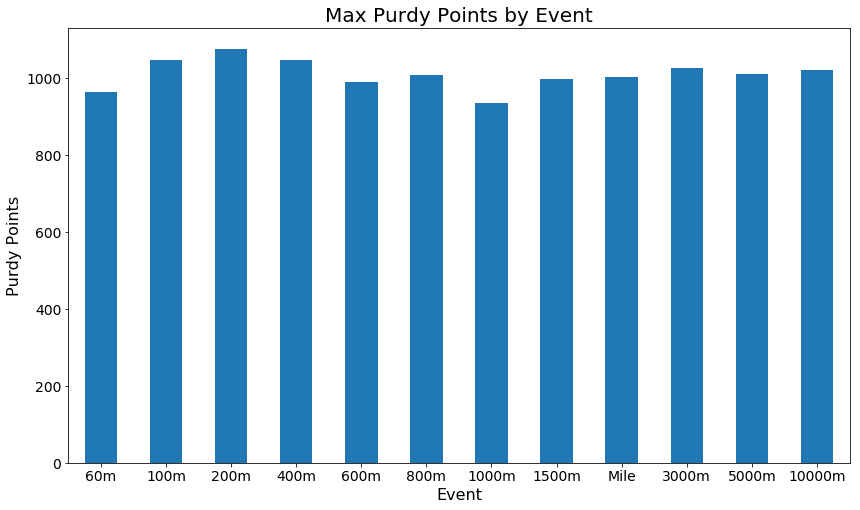

In [15]:
# almost all of the top purdy points performances are on par with one another, with the excepting of the 55 and 1600 which
# are rarely ran
pd.DataFrame(plot_dict).T.plot(kind='bar', legend=False, figsize=(14,8))
plt.title(s='Max Purdy Points by Event', fontsize=20)
plt.xlabel('Event', fontsize=16)
plt.xticks(np.arange(len(plot_dict.keys())), 
           ('60m', '100m', '200m', '400m', '600m', '800m', '1000m', '1500m', 'Mile', '3000m', '5000m', '10000m'), 
           rotation=0,
           fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Purdy Points', fontsize=16);

### Plotting an Athlete's Season; What does a typical sprinter / middle distance runner / distance runner's season look like? 

In [16]:
def athlete_seasonbyseason_plot(df, athlete_name):
    
    '''
    Inputs the results dataframe, 
    the season (indoor_season or outdoor_season) you want graphs generated for, 
    and the athlete's name (as string)
    '''
    plt.figure(figsize=(14,8))
    years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    
    for year in years:
        athlete = df[(df.Name == athlete_name) & ((df[f'indoor_season_{year}']) | (df[f'outdoor_season_{year}']))].sort_index()
        if len(athlete.index) != 0:
            athlete.index += pd.DateOffset(years=2019-year)
            plt.plot(athlete.purdy_points, linestyle='--', marker='o', label=f'{year} Track')
        else:
            continue
    plt.title(f"{athlete_name}'s Track Performances", fontsize=20)
    plt.tick_params(axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    plt.xlabel('--------------------> \nIndoor to Outdoor Season', fontsize=16)
    plt.ylabel('Purdy Points', fontsize=16)
    plt.legend()

Middle Distance Season

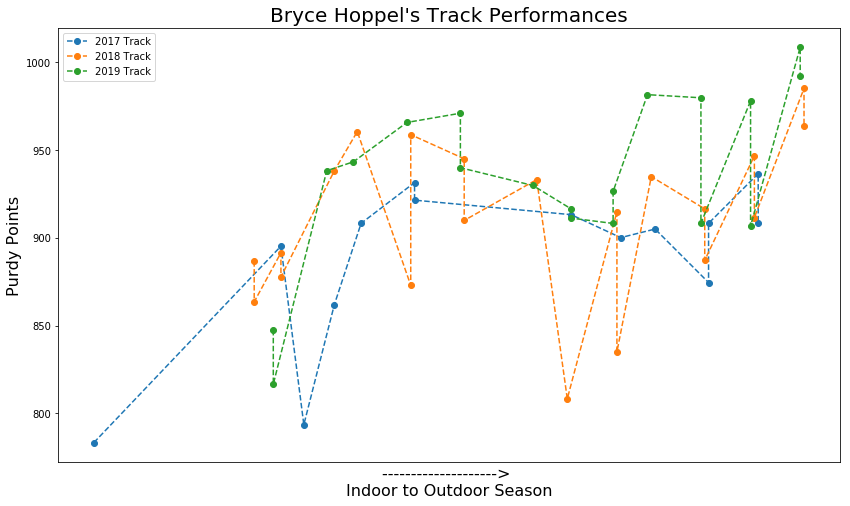

In [17]:
athlete_seasonbyseason_plot(df, 'Bryce Hoppel')

Sprinter Season

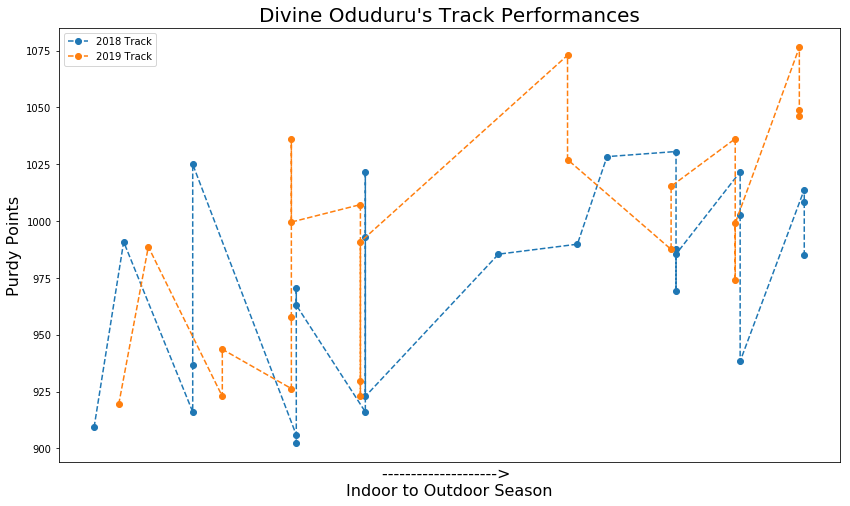

In [19]:
athlete_seasonbyseason_plot(df, 'Divine Oduduru')

Distance Athlete Season

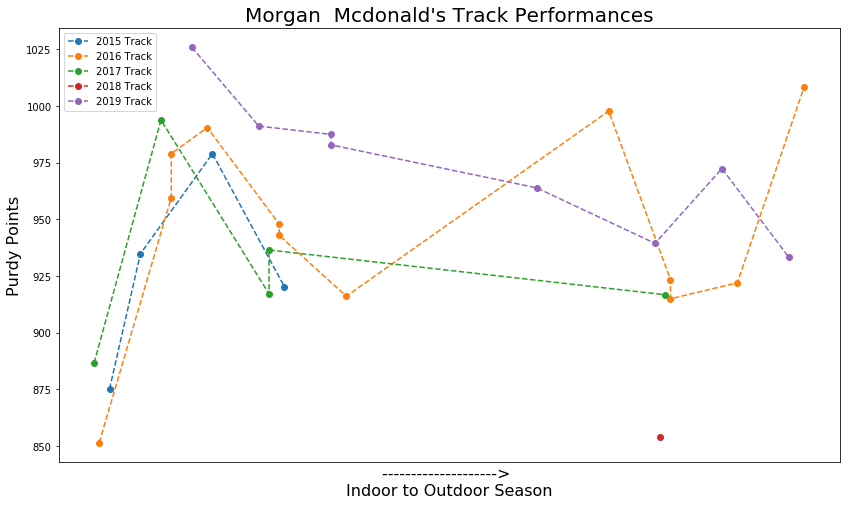

In [20]:
athlete_seasonbyseason_plot(df, 'Morgan  Mcdonald')

### Visualizing Different Event Type Performances by Conference for 2019 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


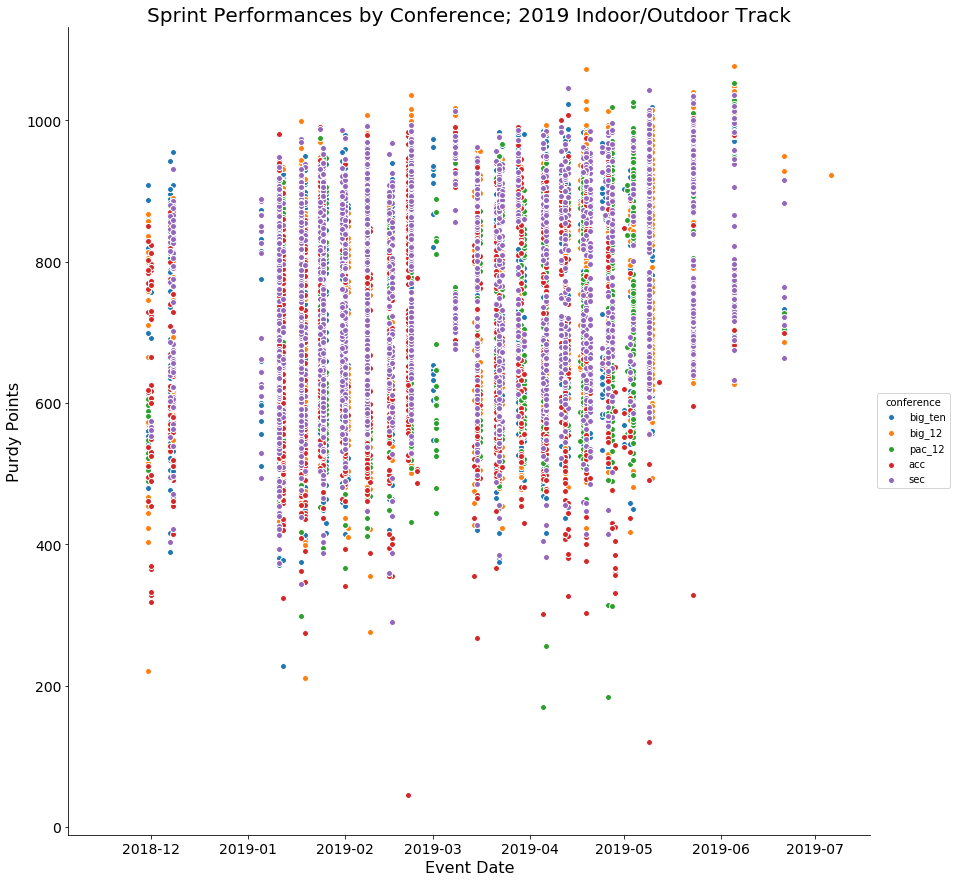

In [25]:
# plot of distance performances better than or equal to a 30:00 10K for 2019, by conference
p5_conf = ['big_ten', 'sec', 'big_12', 'pac_12', 'acc']
conf_plot_2019 = df[(df.conference.isin(p5_conf)) &
                    ((df.outdoor_season_2019) | (df.indoor_season_2019)) &
                    (df.meters < 600) & (df.purdy_points > 0)]
conf_plot_2019['datetime'] = conf_plot_2019.index
sns.pairplot(x_vars=['datetime'], 
             y_vars=['purdy_points'], 
             data=conf_plot_2019, 
             hue='conference', 
             size=12, 
             kind='scatter');
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel(s='Event Date',fontsize=16)
plt.ylabel(s='Purdy Points', fontsize=16)
plt.title('Sprint Performances by Conference; 2019 Indoor/Outdoor Track', fontsize=20);

In [26]:
conf_plot_2019.sort_values('purdy_points', ascending=False)[['Name', 'Team', 'Location', 'Date', 'Events', 'Performance', 'Place', 'purdy_points', 'is_prelim', 'conference']].head(10)

,Name,Team,Location,Date,Events,Performance,Place,purdy_points,is_prelim,conference
datetime,,,,,,,,,,
2019-06-05,Divine Oduduru,Texas Tech,NCAA Division I Outdoor Track & Field Champion...,"06/05 - Jun 08, 2019",200,19.73,1,1076.48,False,big_12
2019-04-19,Divine Oduduru,Texas Tech,Michael Johnson Invitational,"04/19 - Apr 20, 2019",200,19.76,1,1072.97,False,big_12
2019-06-05,Cravon Gillespie,Oregon,NCAA Division I Outdoor Track & Field Champion...,"Jun 5-8, 2019",200,19.93,2,1053.31,False,pac_12
2019-06-05,Divine Oduduru,Texas Tech,NCAA Division I Outdoor Track & Field Champion...,"06/05 - Jun 08, 2019",200,19.97,1,1048.74,True,big_12
2019-04-13,Quincy Hall,South Carolina,Gamecock Invitational Outdoor,13-Apr-19,400,44.53,1,1046.29,False,sec
2019-06-05,Divine Oduduru,Texas Tech,NCAA Division I Outdoor Track & Field Champion...,"06/05 - Jun 08, 2019",100,9.86,1,1046.14,False,big_12
2019-05-09,Quincy Hall,South Carolina,SEC Outdoor Track & Field Championships,"May 9-11, 2019",400,44.6,1,1043.02,False,sec
2019-06-05,Wil London,Baylor,NCAA Division I Outdoor Track & Field Champion...,"06/05 - Jun 08, 2019",400,44.63,3,1041.62,False,big_12
2019-06-05,Jonathan Jones,Texas,NCAA Division I Outdoor Track & Field Champion...,"06/05 - Jun 08, 2019",400,44.64,4,1041.15,False,big_12


In [27]:
df_19 = df[(df.conference.isin(p5_conf)) &
          ((df.outdoor_season_2019) | (df.indoor_season_2019)) &
          (df.conference == 'big_ten')].groupby(['Team', 'conference'], as_index=False).purdy_points.mean()
df_18 = df[(df.conference.isin(p5_conf)) &
          ((df.outdoor_season_2018) | (df.indoor_season_2018)) &
          (df.conference == 'big_ten')].groupby('Team', as_index=False).purdy_points.mean()
df_19['improvement'] = df_19['purdy_points'] - df_18['purdy_points']

In [28]:
df_19

,Team,conference,purdy_points,improvement
0,Illinois,big_ten,706.589502,1.246954
1,Indiana,big_ten,760.608039,19.361697
2,Iowa,big_ten,727.163752,-33.094659
3,Maryland,big_ten,660.127698,-12.972221
4,Michigan,big_ten,736.177032,10.420799
5,Michigan State,big_ten,710.926217,5.109884
6,Minnesota,big_ten,707.341577,-17.370056
7,Nebraska,big_ten,709.692583,19.447923
8,Northwestern,big_ten,547.754458,-16.124455
9,Ohio State,big_ten,760.462801,18.655120


### Taking the Difference of the Mean Best Performance by Team

Is this a good way to visualize if a team is improving from one season to the next?

Text(0.5,1,'Difference in Mean Purdy Points Between 2018 and 2019 Track Seasons')

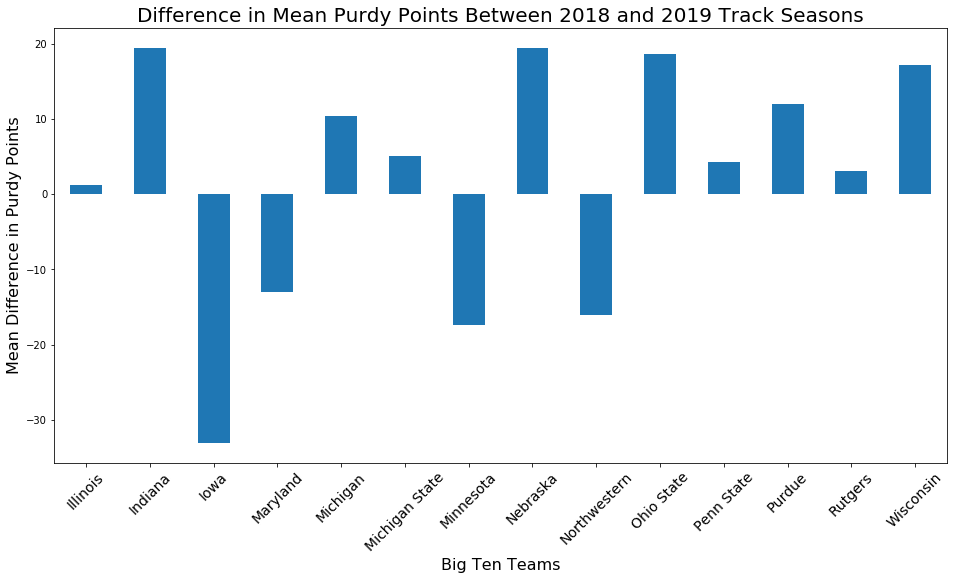

In [29]:
df_19.plot(kind='bar', x= 'Team', y='improvement', legend=False, figsize=(16,8));
plt.xlabel(s='Big Ten Teams', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel(s='Mean Difference in Purdy Points', fontsize=16)
plt.title(s='Difference in Mean Purdy Points Between 2018 and 2019 Track Seasons', fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


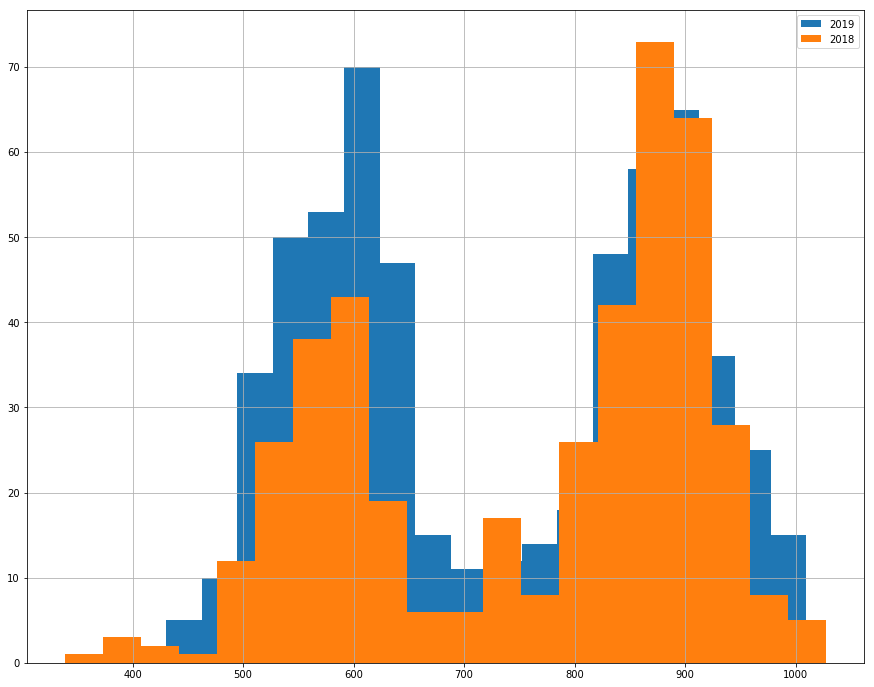

In [30]:
plt.figure(figsize=(15,12))
df_ex = df[(df['Team'] == 'Iowa') & ((df.outdoor_season_2019) | (df.indoor_season_2019))]
df_ex['datetime'] = df_ex.index
df_ex.purdy_points.hist(bins=20, label='2019');
df_ex = df[(df['Team'] == 'Iowa') & ((df.outdoor_season_2018) | (df.indoor_season_2018))]
df_ex.index = df_ex.index + pd.DateOffset(years=1)
df_ex.purdy_points.hist(bins=20, label='2018');
plt.legend();

A: Not especially, unless I was able to stratify the dataset into male and female athletes. That's what the two peaks show; since female and male athletes have different distributions but are all a part of a single team's distribution, increasing or decreasing male or female athletes can mess with the difference in mean purdy points from season to season. That's what happened with Iowa. This isn't a lack of improvement, or even a regression from the previous season, rather they increased the number of females on their team, as shown by the distribution overlay above.

### Visualizing an entire team's Season (each athlete) and what that looks like

In [31]:
def plot_team_seasons(df, Team):
    plt.figure(figsize=(15,12))
    df_ex = df[(df['Team'] == Team) & ((df.outdoor_season_2019) | (df.indoor_season_2019))]
    df_ex['datetime'] = df_ex.index
    df_ex.groupby('Name').purdy_points.plot(kind='line', c='k');
    df_ex = df[(df['Team'] == Team) & ((df.outdoor_season_2018) | (df.indoor_season_2018))]
    df_ex.index = df_ex.index + pd.DateOffset(years=1)
    df_ex.groupby('Name').purdy_points.plot(kind='line', linestyle='--', c='b');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


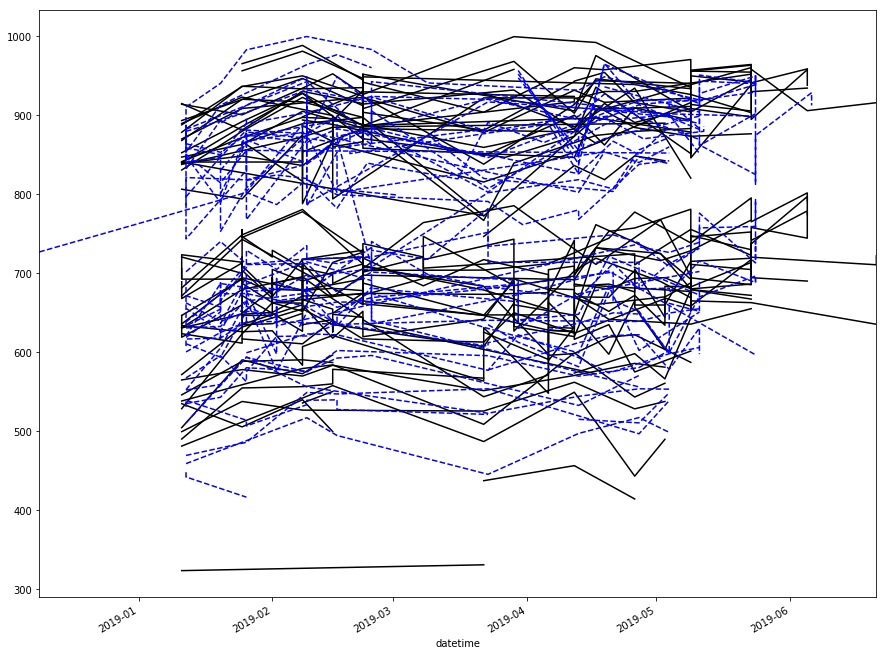

In [32]:
plot_team_seasons(df, 'Arkansas')

A bit messy. Not as clean as I'd like.

### Check out some of the World Championship / Olympians in the dataset

In [34]:
df[(df.oly_or_world_champs)][['Name', 'Team', 'Location', 'Date', 'Events', 'Performance', 'Place', 'purdy_points', 'is_prelim', 'conference']]

,Name,Team,Location,Date,Events,Performance,Place,purdy_points,is_prelim,conference
datetime,,,,,,,,,,
2016-08-12,Aliyah Abrams,South Carolina,Olympic Games,"08/12 - Aug 21, 2016",400,52.79,38,720.01,True,sec
2016-08-12,Brenessa Thompson,Texas A&M,Olympic Games,"Aug 12-21, 2016",100,11.72,53,670.02,True,sec
2016-08-12,Brenessa Thompson,Texas A&M,Olympic Games,"Aug 12-21, 2016",200,23.65,59,693.85,True,sec
2017-08-04,Morgan Mcdonald,Wisconsin,IAAF World Championships,"Aug 4-13, 2017",5000,13:30.7,20,1006.65,True,big_ten
2017-08-04,Wil London,Baylor,IAAF World Championships,"08/04 - Aug 13, 2017",400,45.12,12,1019.02,True,big_12
2017-08-04,Wil London,Baylor,IAAF World Championships,"08/04 - Aug 13, 2017",400,45.1,13,1019.94,True,big_12


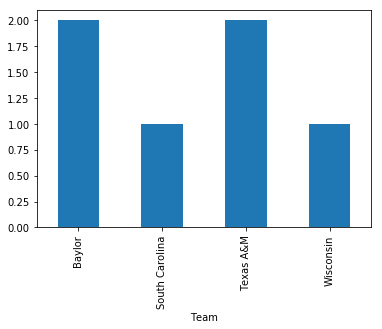

In [35]:
df[(df.oly_or_world_champs)].groupby('Team').oly_or_world_champs.sum().plot(kind='bar');

Interesting which teams end up having athletes competing at the world class level. 3 southern schools and Wisconsin, who had a distance runner.

## Manipulating Data to Create a Model to Predict Final Season Performance (Regression)

In [36]:
def df_purdy_max(df):
    season_list = ['indoor_season_2011', 'outdoor_season_2011',
                     'indoor_season_2012', 'outdoor_season_2012',
                     'indoor_season_2013', 'outdoor_season_2013',
                     'indoor_season_2014', 'outdoor_season_2014',
                     'indoor_season_2015', 'outdoor_season_2015',
                     'indoor_season_2016', 'outdoor_season_2016',
                     'indoor_season_2017', 'outdoor_season_2017',
                     'indoor_season_2018', 'outdoor_season_2018']
    season_list.reverse()
    purdy_df = pd.merge(df[df['outdoor_season_2019']].groupby('Name', as_index=False).purdy_points.max().rename(columns={'purdy_points': 'max_purdy_outdoor_season_2019'}), 
         df[df['indoor_season_2019']].groupby('Name', as_index=False).purdy_points.max().rename(columns={'purdy_points': 'max_purdy_indoor_season_2019'}), 
         how='outer',
         on='Name')
    for season in season_list:
        purdy_df = pd.merge(purdy_df,
                            df[df[season]].groupby('Name', as_index=False).purdy_points.max().rename(columns={'purdy_points': f'max_purdy_{season}'}),
                            how = 'outer',
                            on='Name')
    return purdy_df

In [37]:
df_model = df_purdy_max(df)

In [38]:
df_model = df_model.T.apply(lambda x: pd.Series(x.dropna().values)).T

In [39]:
df_model.columns = ['Name',
                   's1',
                   's2',
                   's3',
                   's4',
                   's5', 
                   's6',
                   's7',
                   's8',
                   's9',
                   's10']

In [40]:
df_model = pd.concat([df_model.T.fillna(df_model.drop(columns=['Name', 's1']).median(axis=1)).T,
                      df_model[df_model.drop(columns=['Name']).columns.to_list()].isnull().astype(int).add_suffix('_indicator')], 
                      axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [42]:
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [43]:
df_outdoors = df[df['outdoor_season_2011']].groupby('Name', as_index=False).outdoor_track_nationals.sum().rename(columns={'outdoor_track_nationals': 'outdoor_natls_events_ran_2011'})

In [44]:
for year in years:
    df_outdoors = pd.merge(df_outdoors,
         df[df[f'outdoor_season_{year}']].groupby('Name', as_index=False).outdoor_track_nationals.sum().rename(columns={'outdoor_track_nationals': f'outdoor_natls_events_ran_{year}'}),
         how='outer',
         on='Name')

In [45]:
df_outdoors = df_outdoors.T.apply(lambda x: pd.Series(x.dropna().values)).T

In [46]:
df_outdoors.columns = ['Name',
                       'outdoor_nats_events_1',
                       'outdoor_nats_events_2',
                       'outdoor_nats_events_3',
                       'outdoor_nats_events_4',
                       'outdoor_nats_events_5',
                       'outdoor_nats_events_6']

In [47]:
df_model = pd.merge(df_model,
         df_outdoors,
         how='outer',
         on='Name')

In [48]:
df_indoors = df[df['indoor_season_2011']].groupby('Name', as_index=False).indoor_track_nationals.sum().rename(columns={'indoor_track_nationals': 'indoor_natls_events_ran_2011'})

In [49]:
for year in years:
    df_indoors = pd.merge(df_indoors,
                    df[df[f'indoor_season_{year}']].groupby('Name', as_index=False).indoor_track_nationals.sum().rename(columns={'indoor_track_nationals': f'indoor_natls_events_ran_{year}'}),
                    how='outer',
                    on='Name')

In [50]:
df_indoors = df_indoors.T.apply(lambda x: pd.Series(x.dropna().values)).T

In [51]:
df_indoors.columns = ['Name',
                       'indoor_nats_events_1',
                       'indoor_nats_events_2',
                       'indoor_nats_events_3',
                       'indoor_nats_events_4',
                       'indoor_nats_events_5']

In [52]:
df_model = pd.merge(df_model,
         df_indoors,
         how='outer',
         on='Name')

In [53]:
df_model = pd.merge(df_model,
                  df[df.conference.isin(['big_ten', 'sec', 'big_12', 'pac_12', 'acc'])].groupby('Name', as_index=False).conference.max(),
                  how='outer',
                  on='Name')

In [54]:
def championship_meet_pts(df, df_model):
    # track scoring; 10, 8, 6, 5, 4, 3, 2, 1 (scoring for 1st through 8th places)
    scoring_dict = {8: 1,
                    7: 2,
                    6: 3,
                    5: 4,
                    4: 5,
                    3: 6,
                    2: 8,
                    1: 10}
    seasons = ['indoor_season_2011', 'outdoor_season_2011', 
                   'indoor_season_2012', 'outdoor_season_2012',
                   'indoor_season_2013', 'outdoor_season_2013',
                   'indoor_season_2014', 'outdoor_season_2014',
                   'indoor_season_2015', 'outdoor_season_2015',
                   'indoor_season_2016', 'outdoor_season_2016',
                   'indoor_season_2017', 'outdoor_season_2017',
                   'indoor_season_2018', 'outdoor_season_2018',
                   'indoor_season_2019', 'outdoor_season_2019']
    champ_meets = ['conf_championship', 'indoor_track_nationals', 'outdoor_track_nationals']
    
    for meet in champ_meets:
        # you only score if you're in the top 8 in a final
        df_points = df[(df[f'{meet}']) & (df.Place <= 8) & ~(df.is_prelim)]
        df_points['Place'] = df_points.Place.map(scoring_dict)
        for season in seasons:
            # you only score if you're top 8 in a final
            df_model = pd.merge(df_model,
                                df_points[df_points[f'{season}']].groupby('Name', as_index=False).Place.sum().rename(columns={'Place': f'{season}_{meet}_pts'}),
                                how='outer',
                                on='Name')
            if df_model[f'{season}_{meet}_pts'].notnull().sum() > 0:
                df_model[f'{season}_{meet}_pts'] = df_model[f'{season}_{meet}_pts'].fillna(0)
            else:
                df_model.drop(columns=[f'{season}_{meet}_pts'], inplace=True)
    return df_model

In [55]:
df_model = championship_meet_pts(df, df_model)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [56]:
df_max_champs_events = df[((df.conf_championship) |
    (df.outdoor_track_regionals) |
    (df.outdoor_track_nationals) |
    (df.indoor_track_nationals))].groupby('Name', as_index=False).meters.max()

In [57]:
df_max_champs_events = pd.concat([df_max_champs_events, df[~df.Name.isin(df_max_champs_events.Name)].groupby('Name', as_index=False).meters.max()]).rename(columns={'meters': 'max_event'})

In [58]:
df_max_champs_events.max_event = df_max_champs_events.max_event.apply(lambda x: 'sprinter' if x < 600 else ('mid_d' if x < 1610 else 'distance'))

In [59]:
df_model = pd.merge(df_model,
         df_max_champs_events,
         how='outer',
         on='Name')

In [60]:
df_model = pd.get_dummies(df_model, columns=['max_event', 'conference'], drop_first=True)

In [61]:
def usas_worlds_appearances(df, df_model):
    important_meets = [
        'usa_championship',
        'oly_or_world_champs',
        'world_jr_championship',
        'usa_jr_championship'
    ]
    for meet in important_meets:
        merger_df = df[df[f'{meet}']].groupby('Name', as_index=False)[f'{meet}'].sum().rename(columns={f'{meet}': f'{meet}_appearances'})
        df_model = pd.merge(df_model,
                            merger_df,
                            how='outer',
                            on='Name')
        df_model[f'{meet}_appearances'] = df_model[f'{meet}_appearances'].fillna(0)
    return df_model

In [62]:
df_model = usas_worlds_appearances(df, df_model)

In [63]:
df_model = pd.merge(df_model,
                    df[df.Name.isin(df_model.Name.unique())].groupby('Name', as_index=False).Team.max(),
                    how='outer',
                    on='Name')

In [64]:
df_model = pd.get_dummies(df_model, columns=['Team'], drop_first=True)

In [65]:
# create 'missing indicator' for all indoor / outdoor track nats events counts that don't exist yet
df_model = df_model.fillna(999)

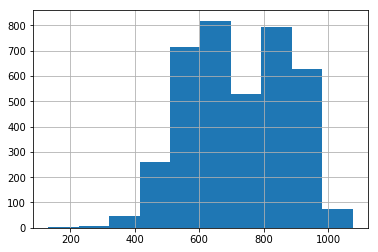

In [66]:
# important to note; two humps makes sense! Women's / Men's data combined, and no gender column
df_model['s1'].hist();

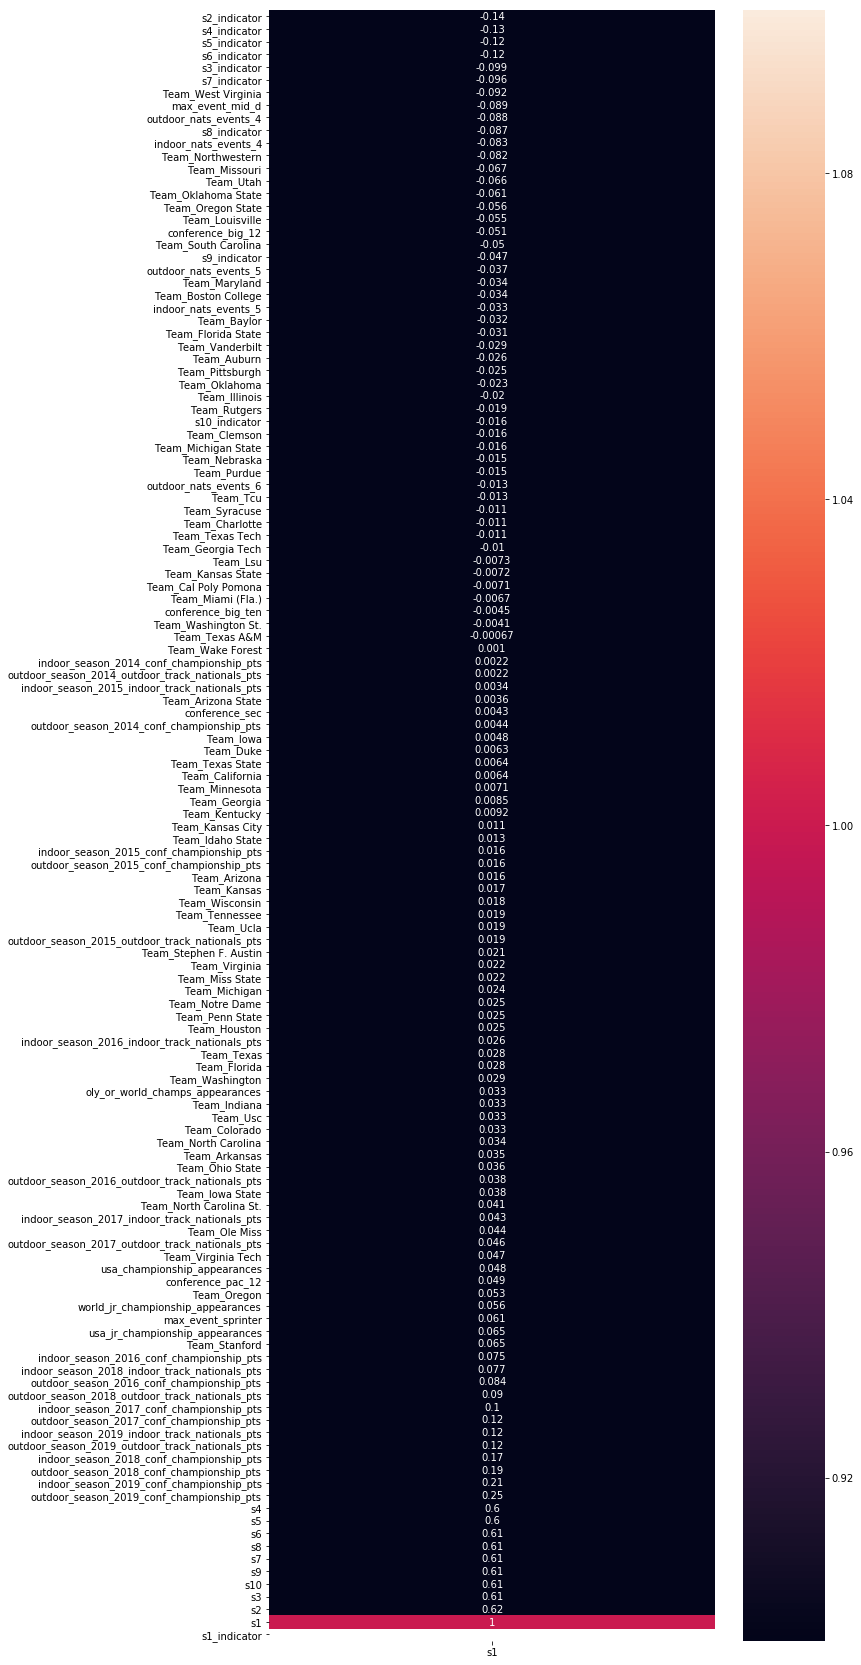

In [67]:
plt.figure(figsize=(10, 30))
sns.heatmap(df_model.drop(columns=['Name']).corr().sort_values(by='s1', ascending=True)[['s1']], 
            vmin=1,
            annot=True);

## Linear Regression

Starting with linear regression to predict the most recent season's purdy points and see what the coefficients look like

In [68]:
X = df_model.drop(columns=['Name', 
                           's1', 
                           'outdoor_season_2019_outdoor_track_nationals_pts', 
                           'outdoor_season_2019_conf_championship_pts',
                           'outdoor_season_2018_conf_championship_pts',
                           'outdoor_season_2018_outdoor_track_nationals_pts'])
y = df_model['s1']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [69]:
pipe_linreg = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('linreg', LinearRegression())
])

pipe_lasso = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lasso', Lasso())
])

pipe_ridge = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('ridge', Ridge())
])

In [70]:
params_linreg = {
    'pf__degree': [1]
}

params_lasso = {
    'pf__degree': [1],
    'lasso__alpha': [.65]
}

params_ridge = {
    'pf__degree': [1],
    'ridge__alpha': [0.5, 1, 5]
}

Linear Regression Grid Search

In [71]:
gs_linreg = GridSearchCV(pipe_linreg, params_linreg, cv=3, verbose=1)

In [72]:
gs_linreg.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pf',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linreg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                 

In [73]:
gs_linreg.best_params_

{'pf__degree': 1}

In [74]:
gs_linreg.score(X_test, y_test)

-3.188095677158076e+23

LASSO Regression Grid Search

In [75]:
gs_lasso = GridSearchCV(pipe_lasso, params_lasso, cv=3, verbose=1)

In [76]:
gs_lasso.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pf',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                     

In [77]:
gs_lasso.best_params_

{'lasso__alpha': 0.65, 'pf__degree': 1}

In [78]:
gs_lasso.score(X_train, y_train)

0.7962127384666537

In [79]:
gs_lasso.score(X_test, y_test)

0.7674607827419733

Ridge Regression Grid Search

In [80]:
gs_ridge = GridSearchCV(pipe_ridge, params_ridge, cv=3, verbose=1)

In [81]:
gs_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pf',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                     

In [82]:
gs_ridge.best_params_

{'pf__degree': 1, 'ridge__alpha': 5}

In [83]:
gs_ridge.score(X_train, y_train)

0.7981057570664833

In [84]:
gs_ridge.score(X_test, y_test)

0.7644434802490968

Lasso Regression FTW!

In [85]:
gs_lasso.best_params_

{'lasso__alpha': 0.65, 'pf__degree': 1}

In [86]:
lasso_reg = Lasso(alpha=0.65)
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [87]:
lasso_reg.fit(Xs_train, y_train)

Lasso(alpha=0.65, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
lasso_reg.score(Xs_test, y_test)

0.7674607827419732

Best R2 Score: Lasso Regression; Use that for final model choice

In [89]:
col1 = pd.Series(X_train.columns.to_list())

In [90]:
col2 = pd.Series(lasso_reg.coef_.tolist())

In [92]:
df_betas = pd.concat([col1, col2], axis=1)

In [93]:
df_betas.columns = ['columns', 'coefficients']

###  Visualizing the Best and Worst Indicators of Seasonal Purdy Point Max Prediction

In [94]:
df_betas.sort_values(by='coefficients').head(5)

,columns,coefficients
10,s2_indicator,-117.689963
49,max_event_mid_d,-4.387859
128,Team_West Virginia,-3.843028
97,Team_Northwestern,-3.084939
101,Team_Oklahoma State,-2.480996


In [95]:
df_betas.sort_values(by='coefficients', ascending=False).head(5)

,columns,coefficients
0,s2,86.944253
1,s3,31.020980
7,s9,18.377475
8,s10,16.913080
3,s5,8.555709
